<a href="https://colab.research.google.com/github/Ngocnguyen11906/DATA-SCIENCE-212/blob/main/MUSHROOM_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,confusion_matrix,accuracy_score


In [17]:
data = pd.read_csv("/content/drive/My Drive/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [18]:
data.shape

(8124, 23)

In [22]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [23]:
for col in data.columns:
    if '-' in col:
        data = data.rename(columns={col:col.replace('-','_')})
        
data.rename(columns = {'class':'class_ep'}, inplace = True)

In [24]:
data.columns

Index(['class_ep', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

THÔNG TIN 23 THUỘC TÍNH
1.class_ep: edible=e, poisonous=p
2.cap_shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
3.cap_surface: fibrous=f,grooves=g,scaly=y,smooth=s
4.cap_color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
5.bruises: bruises=t,no=f
6.odor:almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
7.gill_attachment: attached=a,descending=d,free=f,notched=n
8.gill_spacing: close=c,crowded=w,distant=d
9.gill_size: broad=b,narrow=n
10.gill_color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
11.stalk_shape: enlarging=e,tapering=t
12.stalk_root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
13.stalk_surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
14.stalk_surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
15.stalk_color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16.stalk_color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
17.veil_type: partial=p,universal=u
18.veil_color: brown=n,orange=o,white=w,yellow=y
19.ring_number: none=n,one=o,two=t
20.ring_type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
21.spore_print_color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
22.population: abundant=a,clustered=c,numerous=n,19.scattered=s,several=v,solitary=y
23.habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [25]:
capshape={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
data["cap_shape"]=data["cap_shape"].replace(capshape)

capsurface={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
data["cap_surface"]=data["cap_surface"].replace(capsurface)

capcolor={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["cap_color"]=data["cap_color"].replace(capcolor)

odor={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
data["odor"]=data["odor"].replace(odor)
gillattachment={"a":"attached","f":"free"}
data["gill_attachment"]=data["gill_attachment"].replace(gillattachment)

gillspacing={"c":"close","w":"crowded"}
data["gill_spacing"]=data["gill_spacing"].replace(gillspacing)

gillsize={"b":"broad","n":"narrow"}
data["gill_size"]=data["gill_size"].replace(gillsize)

gillcolor={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
data["gill_color"]=data["gill_color"].replace(gillcolor)

stalkshape={"t":"tapering","e":"enlarging"}
data["stalk_shape"]=data["stalk_shape"].replace(stalkshape)

stalkroot={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
data["stalk_root"]=data["stalk_root"].replace(stalkroot)

stalksurface={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
data["stalk_surface_above_ring"]=data["stalk_surface_above_ring"].replace(stalksurface)
data["stalk_surface_below_ring"]=data["stalk_surface_below_ring"].replace(stalksurface)

stalkcolor ={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
data["stalk_color_above_ring"]=data["stalk_color_above_ring"].replace(stalkcolor)
data["stalk_color_below_ring"]=data["stalk_color_below_ring"].replace(stalkcolor)

veiltype={"p":"partial","u":"universal"} 
data["veil_type"]=data["veil_type"].replace(veiltype)

veilcolor={"n":"brown","o":"orange","w":"white","y":"yellow"} 
data["veil_color"]=data["veil_color"].replace(veilcolor)

ringnumber= {"n":"none","o":"one","t":"two"}
data["ring_number"]=data["ring_number"].replace(ringnumber)

ringtype={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
data["ring_type"]=data["ring_type"].replace(ringtype)

sporeprintcolor= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
data["spore_print_color"]=data["spore_print_color"].replace(sporeprintcolor)

population={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
data["population"]=data["population"].replace(population)

habitat={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
data["habitat"]=data["habitat"].replace(habitat)

bruises={"t":"bruises","f":"no"}
data["bruises"]=data["bruises"].replace(bruises)

In [27]:
data.head(10)

,class_ep,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,e,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,e,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,p,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,e,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,e,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,e,bell,smooth,white,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
7,e,bell,scaly,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
8,p,convex,scaly,white,bruises,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
9,e,bell,smooth,yellow,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


PHÂN LOẠI NẤM ĐỘC HAY KHÔNG ĐỘC DỰA TRÊN CAP-SHAPE

In [28]:
def plot_column(x, y):
    plt.figure(figsize=(12, 6))                   
    plt.legend(['Poisonous', 'Edible'], loc='upper right')
    plt.ylabel('Number of the Mushrooms', fontsize=14)
    plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=14)
    plt.title(f'Edible or Poisonous Based on {y}', fontsize=20)
    plotcolumn = sns.countplot(data=data, x=x ,hue='class_ep',order=x.value_counts().index, palette=['red', 'lightgreen'])                     
    for p in plotcolumn.patches:
        plotcolumn.annotate(format(p.get_height(), '.1f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center')

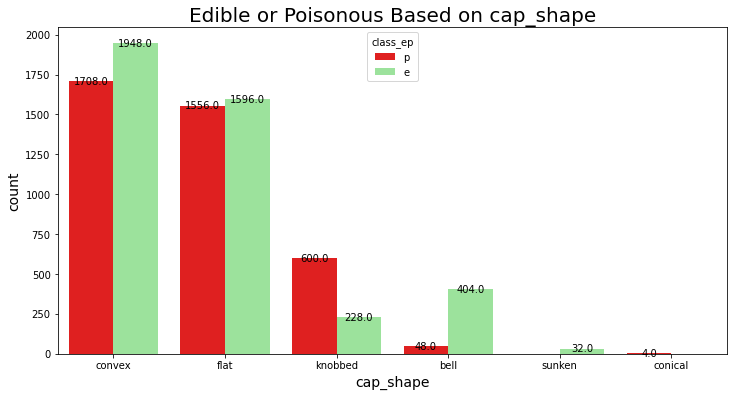

In [29]:
plot_column(data['cap_shape'], 'cap_shape')

Biểu đồ cho thấy:
- Hình dạng nấm chứa độc được xếp hạng theo tỷ lệ từ cao đến thấp là dạng Convex => Flat => Knobbed => Bell=> conical (chứa rất ít độc).
- Hình dạng nấm ăn được xếp hạng theo tỷ lệ từ cao đến thấp là dạng Convex => Flat => Knobbed => Bell=> sunken (hoàn toàn ăn được).

PHÂN LOẠI NẤM ĐỘC HAY KHÔNG ĐỘC DỰA TRÊN CÁC THUỘC TÍNH CÒN LẠI

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



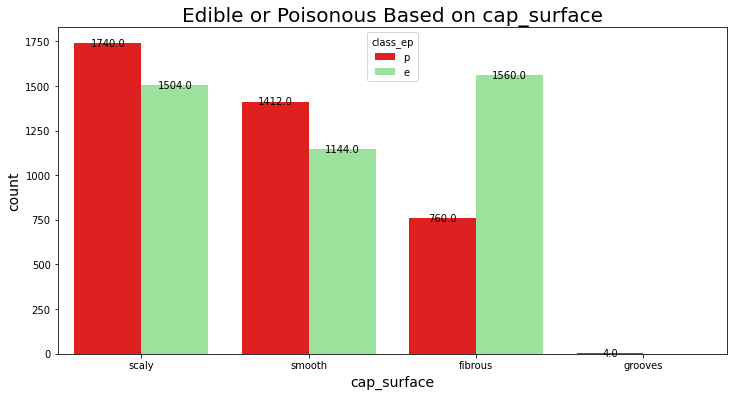

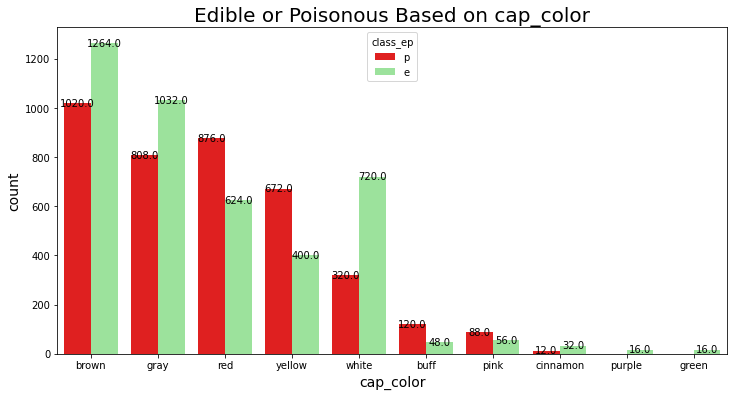

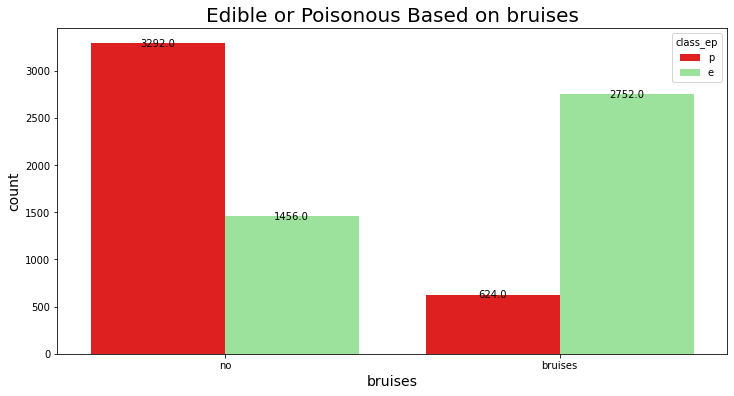

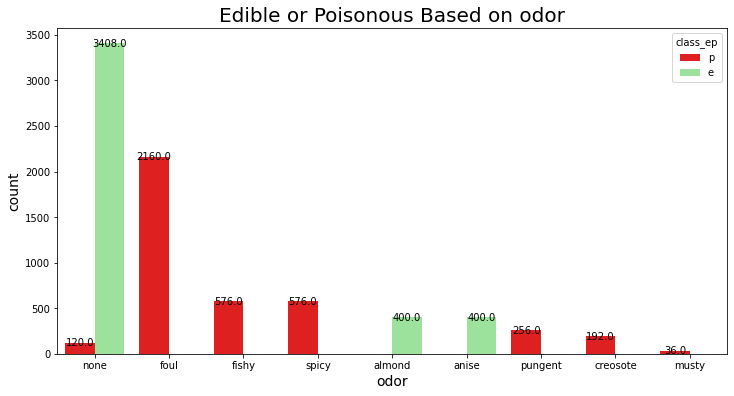

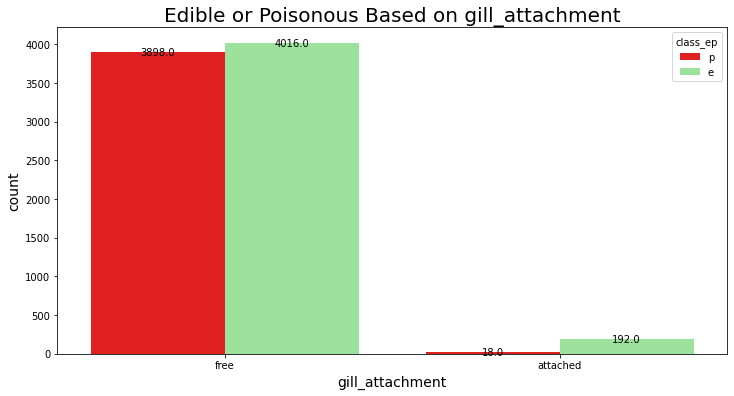

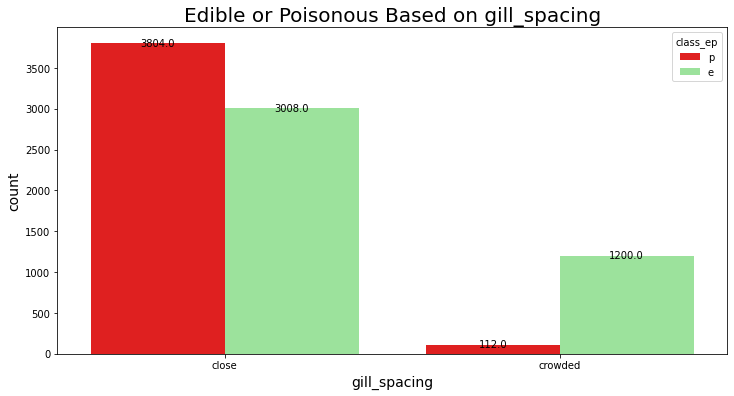

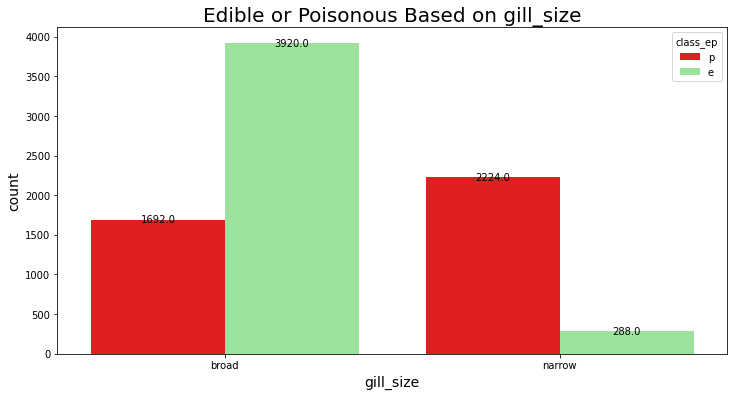

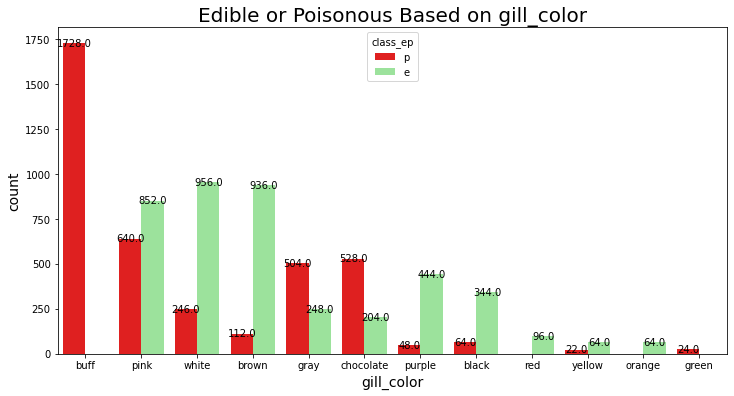

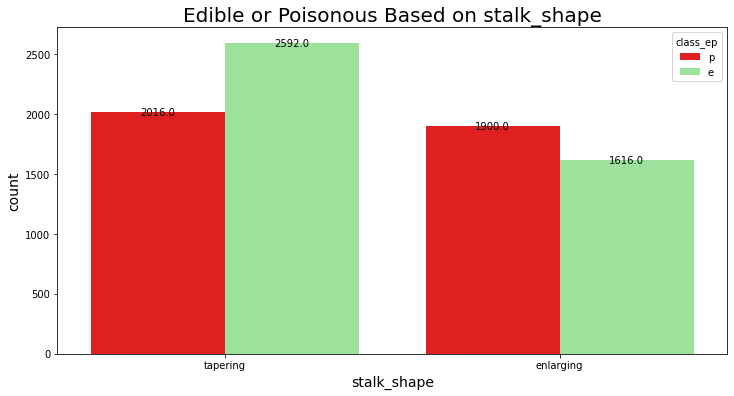

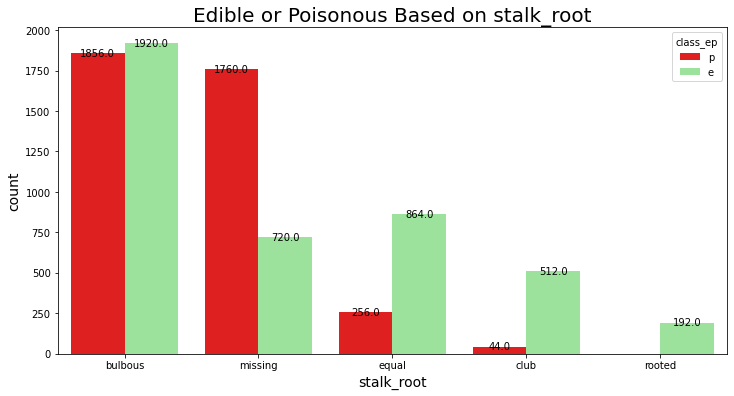

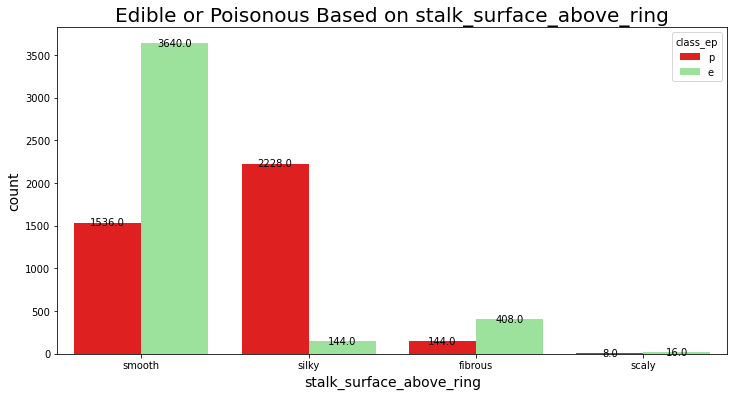

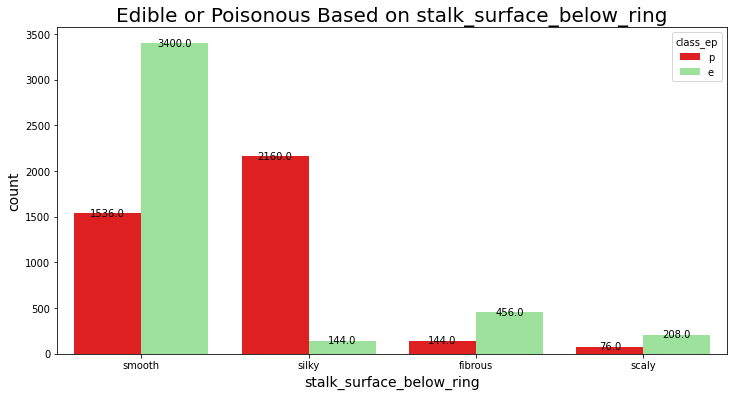

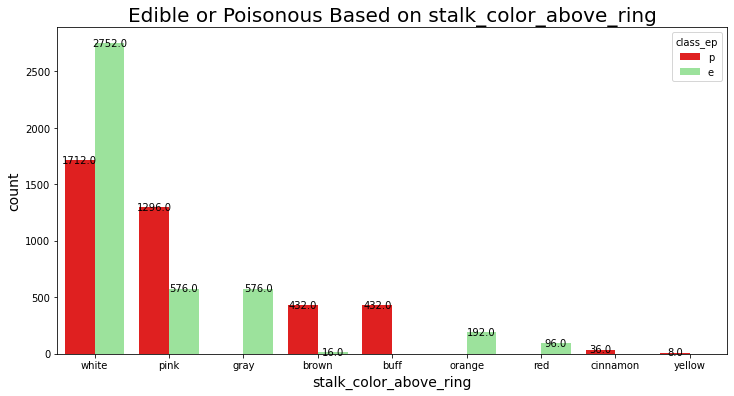

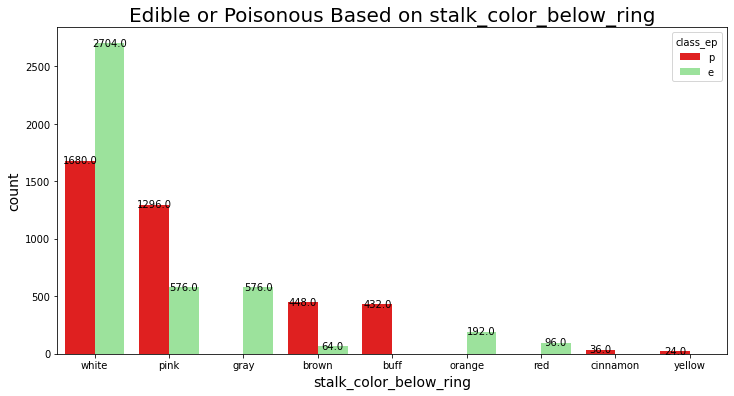

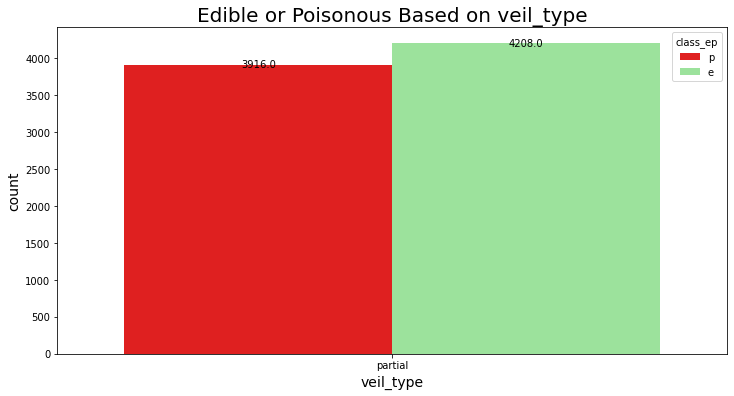

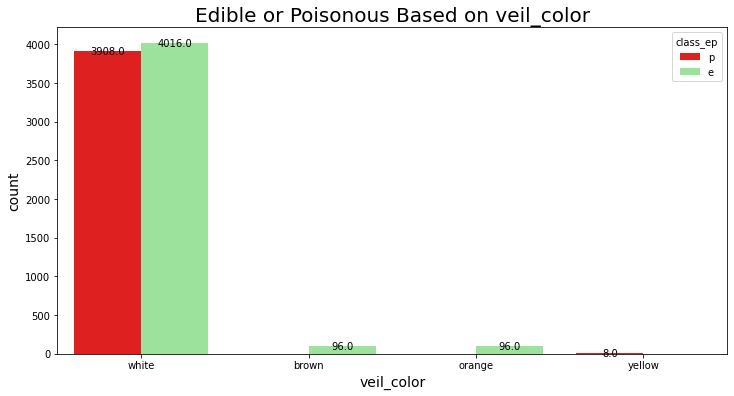

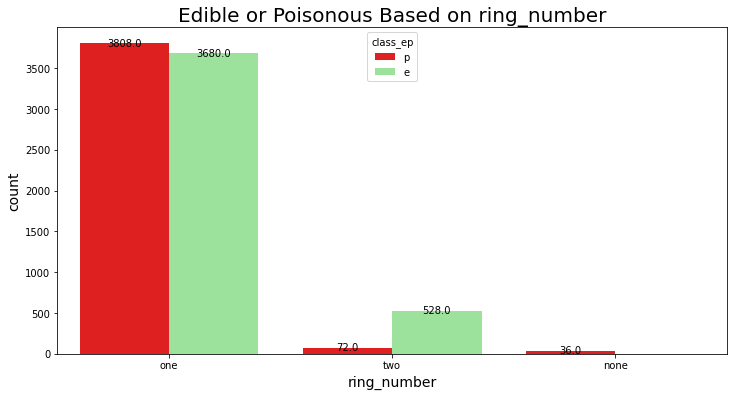

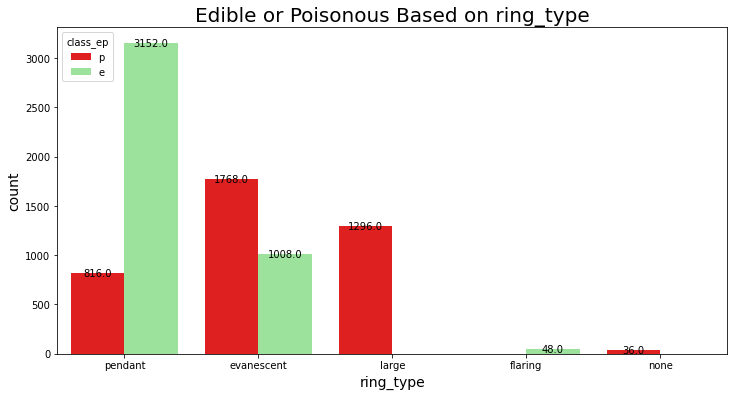

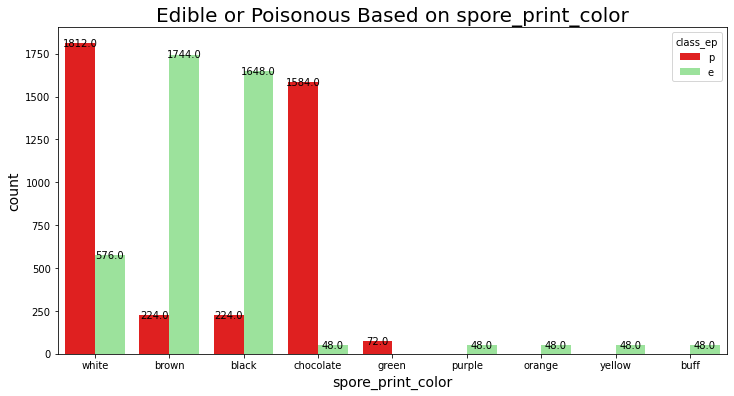

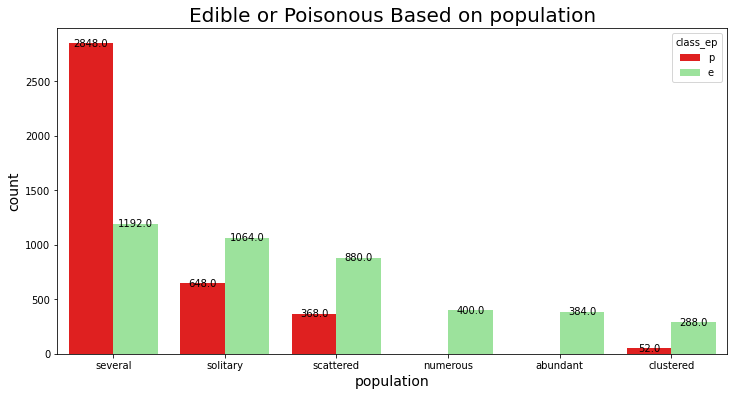

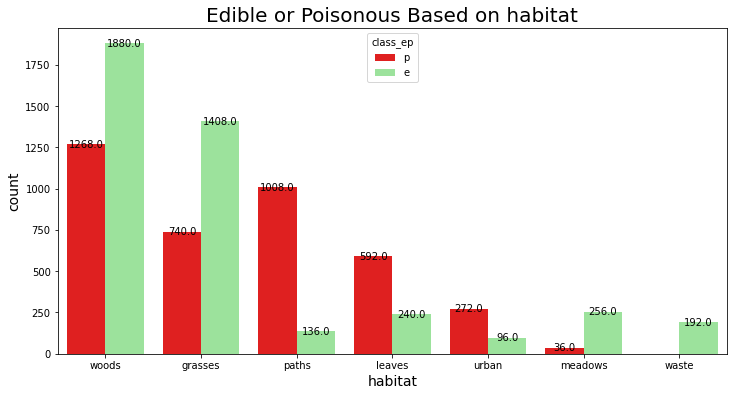

In [30]:
cols = ['cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number','ring_type', 'spore_print_color', 'population', 'habitat']
for col in cols:
    plot_column(data[col], col)

In [35]:
classep_dim = go.parcats.Dimension(
    values=data["class_ep"].values,
    label="Mushroom Types",
    categoryarray=["e", "p"],
    ticktext=['edible', 'poisonous']
)

cap_shape_dim = go.parcats.Dimension(
    values=data["cap_shape"].values,
    label="Cap Shape"
)

cap_surface_dim = go.parcats.Dimension(
  values=data["cap_surface"].values,
  label="Cap Surface"
)
cap_color_dim = go.parcats.Dimension(
  values=data["cap_color"].values,
  label="Cap Color"
)

# Create parcats trace
color = [1 if i=="e" else 0 for i in data["class_ep"]]
colorscale = [[0, 'lightcoral'], [1, 'mediumseagreen']];
data1 = [
    go.Parcats(
        dimensions=[classep_dim,cap_surface_dim,cap_shape_dim,cap_color_dim],
        line={'color': color,
              'colorscale': colorscale},
        hoveron='dimension',
        hoverinfo='count+probability',
        labelfont={'size': 18, 'family': 'Times'},
        tickfont={'size': 16, 'family': 'Times'},
        arrangement='fixed',
    )
    
]


iplot(data1)

NameError: ignored